# Installing Required Dependencies
1. kaggle for Dataset Download
2. py7zr to extract 7z files

In [ ]:
!pip install kaggle # To download our dataset

In [ ]:
!pip install py7zr # To extract our dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.7 MB/s eta 0:00:00



# JSON Configuration and Dataset Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/Naan Mudhalvan/Kaggle_Files/Student_33_Kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/Student_33_Kaggle.json
!mv ~/.kaggle/Student_33_Kaggle.json ~/.kaggle/kaggle.json

!kaggle competitions download -c cifar-10

Mounted at /content/drive
 99% 708M/715M [00:10<00:00, 92.8MB/s]
100% 715M/715M [00:10<00:00, 70.7MB/s]


# Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

from zipfile import ZipFile
import py7zr
import cv2  #Reads Images
from google.colab.patches import cv2_imshow #Prints the images

# Modules for Building Classification Model
import tensorflow as tf
from tensorflow import keras

# ResNet 50
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

# Extraction of Dataset

In [ ]:
dataset = '/content/cifar-10.zip'
print(f'Extracting {dataset}...')

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print(f'{dataset} extracted successfully.')

Extracting /content/cifar-10.zip...
/content/cifar-10.zip extracted successfully.


In [ ]:
print(f'Extracting /content/train.7z...')

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()
print(f'/content/train.7z extracted successfully.')

Extracting /content/train.7z...
/content/train.7z extracted successfully.


In [ ]:
filenames = os.listdir('/content/train') # Image Names for training purpose

# Processing the Labels

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

# Debug Process
1. First 10 rows
2. Last 10 rows
3. Count by group


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

# Label Modification to Integer

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

# Debug Process

In [ ]:
print(f'Initialized Labels: {labels[0:10]}')
labels_df.head(10)

Initialized Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


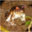

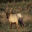

In [ ]:
# Displaying sample images

img = cv2.imread('/content/train/1.png')  # Frog
cv2_imshow(img)

print("\n")

img = cv2.imread('/content/train/4.png') # Deer
cv2_imshow(img)

# Image Processing

In [ ]:
id_list = list(labels_df['id'])
print(f"List of first 10 Images Id: {id_list[0:10]}")

List of first 10 Images Id: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'
print(f"Converting images in {train_data_folder} to numpy arrays...")

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

print(f"Converted Successfully. Each consists of a shape: {data[0].shape}.")

Converting images in /content/train/ to numpy arrays...
Converted Successfully. Each consists of a shape: (32, 32, 3).


In [ ]:
# convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

# Splitting Training Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(f"Dataset Shape: {X.shape}.")
print(f"Labels Shape: {Y.shape}.")
print(f"Training Data Shape: {X_train.shape}.")
print(f"Testing Data Shape: {X_test.shape}.")

Dataset Shape: (50000, 32, 32, 3).
Labels Shape: (50000,).
Training Data Shape: (40000, 32, 32, 3).
Testing Data Shape: (10000, 32, 32, 3).


# Normalization of Data

$$ y = \frac{x}{\max(e)}, \forall x \in e$$

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

print(f"Original training list is \n{X_train[0]}.")
print(f"\n\nTransferred training list to \n{X_train_scaled[0]}.")

Original training list is 
[[[209 210 203]
  [213 214 209]
  [218 219 215]
  ...
  [127  74  39]
  [122  68  35]
  [116  63  32]]

 [[210 210 202]
  [213 214 207]
  [218 220 214]
  ...
  [124  70  35]
  [121  67  33]
  [123  69  36]]

 [[206 205 195]
  [209 209 202]
  [213 215 209]
  ...
  [124  70  37]
  [131  77  42]
  [131  78  41]]

 ...

 [[127 108  97]
  [138 122 110]
  [141 127 118]
  ...
  [158 149 134]
  [161 156 151]
  [136 137 148]]

 [[145 130 119]
  [148 135 128]
  [136 127 128]
  ...
  [175 174 172]
  [160 161 170]
  [143 148 164]]

 [[138 128 123]
  [140 132 136]
  [136 131 140]
  ...
  [150 154 169]
  [145 149 166]
  [140 145 163]]].


Transferred training list to 
[[[0.81960784 0.82352941 0.79607843]
  [0.83529412 0.83921569 0.81960784]
  [0.85490196 0.85882353 0.84313725]
  ...
  [0.49803922 0.29019608 0.15294118]
  [0.47843137 0.26666667 0.1372549 ]
  [0.45490196 0.24705882 0.1254902 ]]

 [[0.82352941 0.82352941 0.79215686]
  [0.83529412 0.83921569 0.81176471]
  [0.8

# Building the Neural Network
The ReLU (Rectified Linear Unit) function is a commonly used activation function in neural networks. It is defined as:

$$ \text{ReLU}(x) = \max(0, x) $$


In other words, it outputs the input x if it's positive, and outputs 0 otherwise.

The softmax function takes a vector of arbitrary real-valued scores z and computes probabilities for each score z_i as follows:

$$
\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Here, K is the number of classes, and e is Euler's number (approximately equal to 2.71828). This function normalizes the scores into a probability distribution, ensuring they sum up to 1.



In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 7s 4ms/step - loss: 1.9489 - acc: 0.2956 - val_loss: 1.8333 - val_acc: 0.3377
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8235 - acc: 0.3453 - val_loss: 1.7558 - val_acc: 0.3728
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7624 - acc: 0.3716 - val_loss: 1.7181 - val_acc: 0.3800
Epoch 4/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7296 - acc: 0.3859 - val_loss: 1.7119 - val_acc: 0.3820
Epoch 5/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.7081 - acc: 0.3902 - val_loss: 1.7184 - val_acc: 0.3720
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6854 - acc: 0.4013 - val_loss: 1.6756 - val_acc: 0.3932
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6712 - acc: 0.4075 - val_loss: 1.6699 - val_acc: 0.4010
Epoch 8/10
1125/1125 [==============================] - 4s 4ms

# ResNet50
Run only if you are creating the model for first time.

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 475s 390ms/step - loss: 2.1577 - acc: 0.2171 - val_loss: 1.9481 - val_acc: 0.2765
Epoch 2/10
1125/1125 [==============================] - 446s 396ms/step - loss: 1.5034 - acc: 0.4491 - val_loss: 1.3821 - val_acc: 0.5060
Epoch 3/10
1125/1125 [==============================] - 446s 397ms/step - loss: 1.2349 - acc: 0.5718 - val_loss: 1.2419 - val_acc: 0.5903
Epoch 4/10
1125/1125 [==============================] - 446s 396ms/step - loss: 1.0734 - acc: 0.6325 - val_loss: 0.9879 - val_acc: 0.6495
Epoch 5/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.9754 - acc: 0.6702 - val_loss: 1.0482 - val_acc: 0.6560
Epoch 6/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.8694 - acc: 0.7097 - val_loss: 0.8592 - val_acc: 0.6982
Epoch 7/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.7943 - acc: 0.7384 - val_loss: 0.8088 - val_acc: 0.7280
Epoch 8/10
1125/1125 [============

In [ ]:
#Save the model

model.save("/content/drive/MyDrive/Naan Mudhalvan/object_recognition_model.keras")
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 39s 117ms/step - loss: 0.6739 - acc: 0.7806
Test Accuracy = 0.7806000113487244


# Evaluation of Loss and accuracy

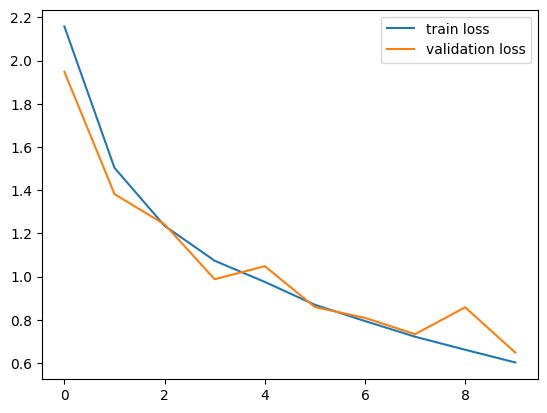

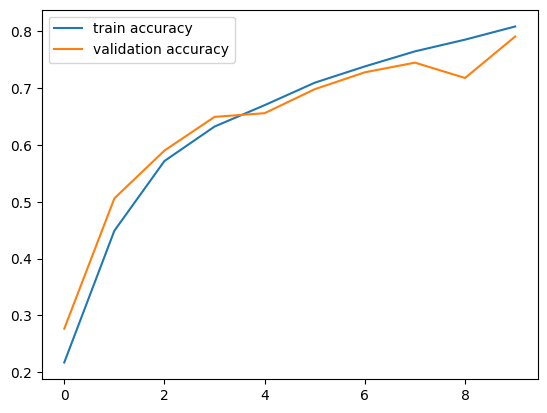

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Sample Prediction Testcase

In [ ]:
# Load the Saved model
saved_model_path = "/content/drive/MyDrive/Naan Mudhalvan/object_recognition_model.keras"
loaded_model = keras.models.load_model(saved_model_path)


1/1 [==============================] - 0s 37ms/step


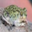



Predicted class: frog.


In [ ]:
sample_image_path = "/content/train/211.png"  # Path of an image of a Frog
sample_image = keras.preprocessing.image.load_img(sample_image_path, target_size=(32, 32))
sample_image_array = keras.preprocessing.image.img_to_array(sample_image)
sample_image_scaled = sample_image_array / 255.0
sample_image_scaled = np.expand_dims(sample_image_scaled, axis=0)

# Use the loaded model to predict the class of the sample image
predicted_probabilities = loaded_model.predict(sample_image_scaled)
predicted_class_index = np.argmax(predicted_probabilities)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_name = class_names[predicted_class_index]

# Display the sample image along with the predicted class label
myimage = cv2.imread(sample_image_path)
cv2_imshow(myimage)
print('\n')

print(f"Predicted class: {predicted_class_name}.")

# Model Fine Tuning Phase

In [ ]:
loaded_model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = loaded_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
loaded_model.save("/content/drive/MyDrive/Naan Mudhalvan/updated_object_recognition_model.keras")


Epoch 1/5
1125/1125 [==============================] - 480s 399ms/step - loss: 0.4750 - acc: 0.8510 - val_loss: 0.5334 - val_acc: 0.8298
Epoch 2/5
1125/1125 [==============================] - 440s 391ms/step - loss: 0.4331 - acc: 0.8658 - val_loss: 0.5251 - val_acc: 0.8300
Epoch 3/5
1125/1125 [==============================] - 440s 391ms/step - loss: 0.4199 - acc: 0.8687 - val_loss: 0.5209 - val_acc: 0.8292
Epoch 4/5
1125/1125 [==============================] - 447s 397ms/step - loss: 0.4019 - acc: 0.8739 - val_loss: 0.5141 - val_acc: 0.8315
Epoch 5/5
1125/1125 [==============================] - 447s 397ms/step - loss: 0.3920 - acc: 0.8778 - val_loss: 0.5145 - val_acc: 0.8338


In [ ]:
loss, accuracy = loaded_model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 39s 121ms/step - loss: 0.5475 - acc: 0.8190
Test Accuracy = 0.8190000057220459
